Looking at the pdfs. of poisson processes..

The point is that at some level the Gaussian likelihood fails as the number of objects is too small, therefore we must have large bins. Having large bins reduces the information that we use. Contrary to this the poissonian likelihood can be unbinned, however in this limit we cannot include the sample variance info. Here I try to include the sample variance to create an unbinned poissonian/gaussian likelihood...

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.special import gamma
from scipy import integrate
import emcee

from astropy.cosmology import FlatLambdaCDM

In [55]:
cosmo = FlatLambdaCDM( 70 , 0.3 )

In [67]:
cosmo.critical_density(0).to('Msun/Mpc^3')

<Quantity 1.35992947e+11 solMass / Mpc3>

In [66]:
cosmo.critical_density(1).to('Msun/Mpc^3')

<Quantity 4.21578137e+11 solMass / Mpc3>

In [64]:
R = 20

In [69]:
(4/3) * np.pi * cosmo.critical_density(0.1).to('Msun/Mpc^3') * R**3

<Quantity 5.00969413e+15 solMass / Mpc3>

In [3]:
n_int = np.arange( 1 , 100 , 1 )

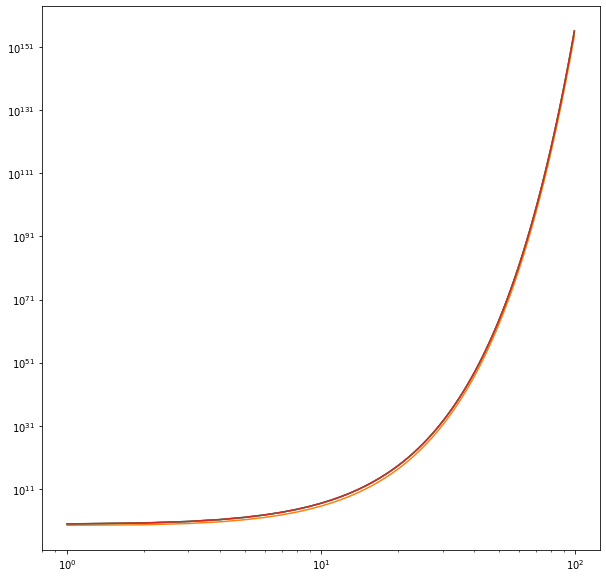

In [4]:
plt.figure( figsize = ( 10 , 10 ))
plt.plot( n_int , [ np.math.factorial( n ) for n in n_int ] )
plt.plot( n_int , np.exp( n_int * np.log( n_int ) - n_int ) )
plt.plot( n_int , np.sqrt( 2*np.pi*n_int ) * ( n_int / np.exp(1) )**n_int )
plt.plot( n_int , gamma( n_int + 1 ) )
plt.yscale('log')
plt.xscale('log')

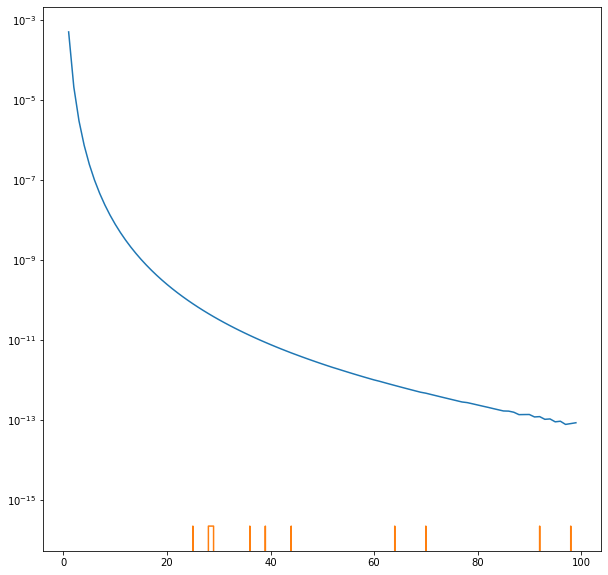

In [5]:
plt.figure( figsize = ( 10 , 10 ))
# plt.plot( n_int , [ np.math.factorial( n ) for n in n_int ]/ np.exp( n_int * np.log( n_int ) - n_int ) - 1  )
plt.plot( n_int , [ np.math.factorial( n ) for n in n_int ]/ ( np.sqrt( 2 * np.pi * n_int ) * ( n_int / np.exp(1) ) ** n_int * ( 1 + 1/( 12 * n_int ) + 1/(288*n_int**2) -139/(51840*n_int**3) - 571/(2488320 * n_int**4))  )  - 1  )
plt.plot( n_int , [ np.math.factorial( n ) for n in n_int ]/gamma( n_int + 1 ) - 1 )
plt.yscale('log')

In [6]:
def p_pdf( x , l ):
    xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))  
    #xfac = gamma( x + 1 )
    return l**x * np.exp( -l )/  xfac

def g_pdf( x , mu , var ):
    return np.exp( -0.5 * ( x - mu )**2/var )/ np.sqrt( 2 * np.pi * var )

In [7]:
# my analytical poissonian is crap

In [8]:
def exact_p_pdf( x , l ):
    return (l**x)/np.math.factorial(x)*(np.exp(-l) )

In [9]:
# n_int = np.arange( 1 , 21 , 1 )

In [10]:
lam_mean = 12

In [11]:
exact_p_pdf_vals = []

for n in n_int:
    exact_p_pdf_vals.append( exact_p_pdf( n , lam_mean ) ) 

In [12]:
np.min( exact_p_pdf_vals ), np.min( p_pdf( n_int , lam_mean ) )

(-7.9874818009291e-06, -8.020829624254053e-06)

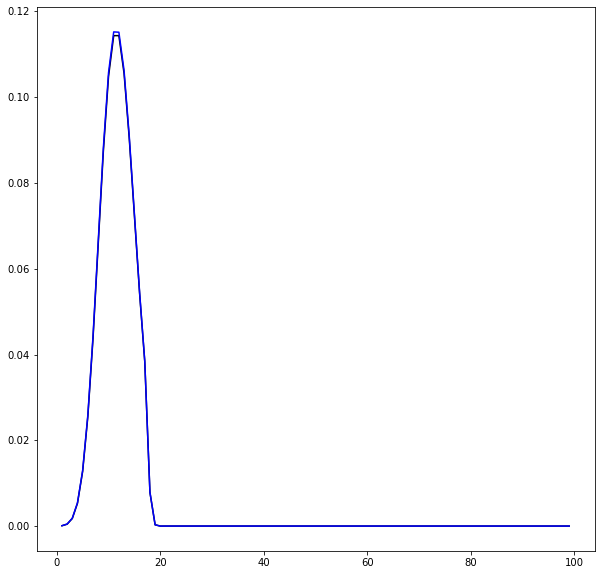

In [13]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( n_int , exact_p_pdf_vals , 'k-' )
plt.plot( n_int , p_pdf( n_int , lam_mean ) , 'b-' )

/tmp/ipykernel_14271/637398964.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( n_int , exact_p_pdf_vals/ p_pdf( n_int , lam_mean ) - 1  , 'k-' )


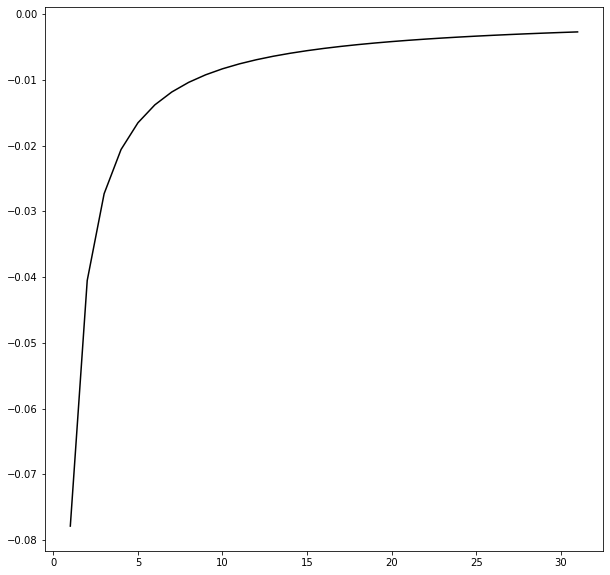

In [14]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( n_int , exact_p_pdf_vals/ p_pdf( n_int , lam_mean ) - 1  , 'k-' )

In [15]:
n_samples = int( 1e6 )

In [16]:
lam_mean = 50

In [17]:
ln_samples = int( 1e7 )

In [18]:
vals = np.random.poisson( lam = lam_mean , size = n_samples )

lvals = np.random.poisson( lam = lam_mean , size = ln_samples )

In [19]:
lvals

array([51, 48, 55, ..., 54, 51, 39])

In [20]:
np.max( vals )

87

In [21]:
n_bins = np.arange( -0.5 , 200 , 1 )
n_cent = ( n_bins[1:] + n_bins[:-1] ) / 2.

In [22]:
n_cent

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [23]:
simple_poiss_counts , _ = np.histogram( vals , bins = n_bins )
lsimple_poiss_counts , _ = np.histogram( lvals , bins = n_bins )

In [24]:
np.mean( vals )

50.004108

In [25]:
p_pdf( 10 , 100 )

1.0337289868717106e-30

/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in power
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in multiply
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: overflow encountered in power
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: invalid value encountered in true_divide
  return l**x * np.exp( -l )/  xfac


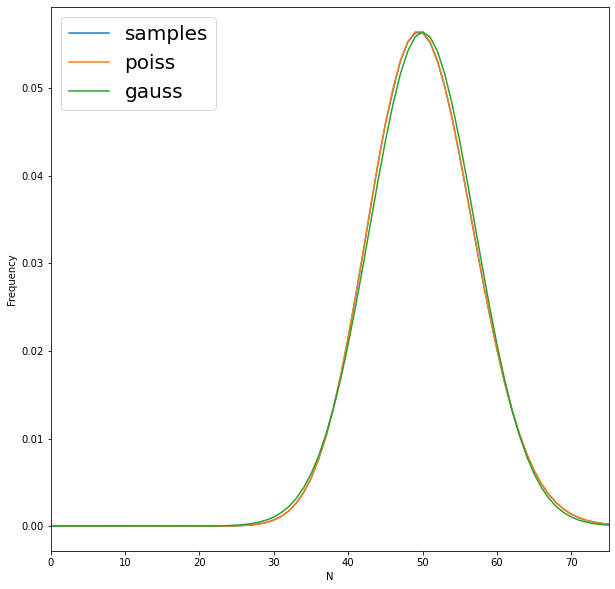

In [26]:
plt.figure( figsize = ( 10 , 10 ) )
# plt.plot( n_cent , simple_poiss_counts / n_samples )
plt.plot( n_cent , lsimple_poiss_counts / ln_samples , label = 'samples' )
plt.plot( n_cent , p_pdf( n_cent , lam_mean  ) , label = 'poiss')
plt.plot( n_cent , g_pdf( n_cent , lam_mean , lam_mean ) , label = 'gauss')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.xlim( 0 , 75 )
# plt.xlim( 25 , 75)
plt.legend( fontsize = 20 )

/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in power
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in multiply
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: overflow encountered in power
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: invalid value encountered in true_divide
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/1740213858.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( n_cent , simple_poiss_counts / ( p_pdf( n_cent , lam_mean )  

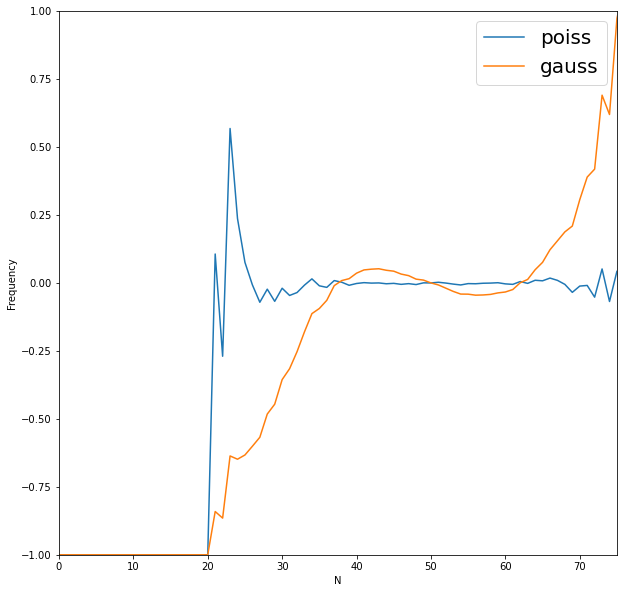

In [27]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( n_cent , simple_poiss_counts / ( p_pdf( n_cent , lam_mean )  ) / n_samples - 1 , label='poiss' )
plt.plot( n_cent , simple_poiss_counts / ( g_pdf( n_cent , lam_mean , lam_mean )  ) / n_samples - 1 , label ='gauss')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.xlim( 0 , 75 )
plt.ylim( -1 , 1 )
plt.legend( fontsize = 20 )

Now consider 100 sub regions where the mean $\lambda$ is allowed to vary, and follows a gaussian distribution, what does this distribution look like?

For sufficiently large values of λ, (say λ>1000), the normal distribution with mean λ and variance λ.

In [28]:
n_regions = n_samples
lambdas = np.random.normal( loc = lam_mean , scale = 5 , size = n_regions )
lambdas

array([47.26704911, 43.75603243, 46.95628791, ..., 51.64644345,
       58.3615516 , 49.0366704 ])

In [29]:
actual_l = np.mean( lambdas )
actual_l

50.00224512392498

In [30]:
np.mean( lambdas ) , np.var( lambdas )

(50.00224512392498, 24.985942033273197)

In [31]:
np.min( lambdas )

24.791301415078358

In [32]:
v = []
for l in lambdas:
    v.append( np.random.poisson( lam = l , size = 1 ) )

v = np.array( v )

In [33]:
v.shape

(1000000, 1)

In [34]:
v[0]

array([48])

In [35]:
v_sum = np.sum( v , axis = 0 )
v_sum.shape

(1,)

In [36]:
v_mean = np.mean( v , axis = 0 )
v_mean.shape

(1,)

In [37]:
np.min( v_mean ), np.max( v_mean )

(50.009746, 50.009746)

In [38]:
v_full = v.flatten()

In [39]:
v_full.shape

(1000000,)

In [40]:
# small_n_bins = np.arange( 0.5 , 2 , 0.01 )
# small_n_cent = ( small_n_bins[1:] + small_n_bins[:-1] )/2.
n_mean_counts , _ = np.histogram( v_full , bins = n_bins )

In [41]:
np.mean( v_full ) , np.var( v_full )

(50.009746, 75.04592901548402)

What is this new distribution? 

Is it well described by,

\begin{equation}
p(l_i| \Omega_m , \sigma_8) = \int p_{norm}( l_i , \left< l \right>(\Omega_m , \sigma_8) ) p_{poiss}( l_i ) dl
\end{equation}



In [42]:
def __integrand_poiss_gauss__( l , x , l_mean , sigma_l ):
    p_gauss = g_pdf( l , l_mean , sigma_l )
    p_poiss = p_pdf( x , l )
    return p_poiss * p_gauss

In [43]:
__integrand_poiss_gauss__( 5 , 5 , 10 , 2 )

9.715823568018867e-05

In [44]:
_l_ = np.arange( 0 , 100 , 0.1 )
int_vals = __integrand_poiss_gauss__( _l_ , 50 , 50 , 2 )


In [45]:
integrate.simps( int_vals , x = _l_  )

0.0553221624942942

In [46]:
def numeric_poiss_gauss( n ):
    int_vals = __integrand_poiss_gauss__( _l_ , n , 50 , 5**2 )
    return integrate.simps( int_vals , x = _l_  )

In [47]:
npg = []

for n in n_cent:
    npg.append( numeric_poiss_gauss( n ) )

/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: overflow encountered in power
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in double_scalars
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: invalid value encountered in true_divide
  return l**x * np.exp( -l )/  xfac


In [48]:
plt.rcParams['axes.linewidth']=3

/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in power
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in multiply
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: overflow encountered in power
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return l**x * np.exp( -l )/  xfac
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: invalid value encountered in true_divide
  return l**x * np.exp( -l )/  xfac


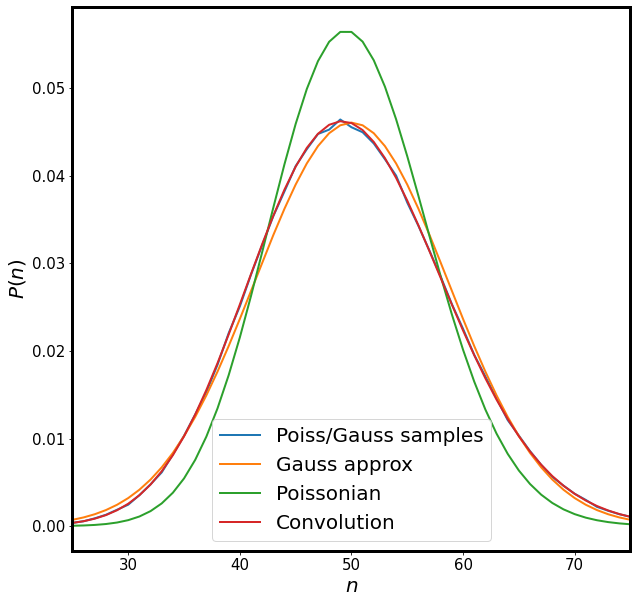

In [49]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( n_cent , n_mean_counts/( n_samples ) , lw = 2 , label = 'Poiss/Gauss samples')
plt.plot( n_cent , g_pdf( n_cent , 50 , 75 ) , lw = 2 , label = 'Gauss approx')
plt.plot( n_cent , p_pdf( n_cent , 50 ) , lw = 2 , label = 'Poissonian')
plt.plot( n_cent , npg , lw = 2 , label = 'Convolution')
plt.legend( fontsize = 20 )
plt.xlim( 25 , 75 )
plt.xlabel('$n$' , fontsize = 20 )
plt.ylabel('$P(n)$' , fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )
plt.savefig('toy_example_pdf.png')

/tmp/ipykernel_14271/3878331090.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot( n_cent , n_mean_counts/( n_samples )  / (lsimple_poiss_counts / ln_samples)  - 1 , 'k', label = 'Poissonian from data')
/tmp/ipykernel_14271/3878331090.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( n_cent , n_mean_counts/( n_samples )  / (lsimple_poiss_counts / ln_samples)  - 1 , 'k', label = 'Poissonian from data')
/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in power
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:2: RuntimeWarning: overflow encountered in multiply
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 )#+ 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
/tmp/ipykernel_14271/3025062552.py:4: RuntimeWarning: overflow encountered in power
  return l**

(-1.0, 1.0)

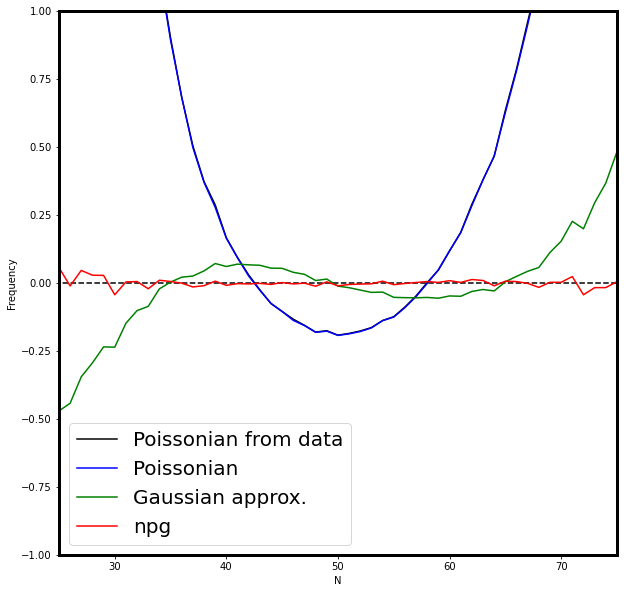

In [50]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( [ 0 , 150 ] , [  0 , 0 ] , 'k--')

plt.plot( n_cent , n_mean_counts/( n_samples )  / (lsimple_poiss_counts / ln_samples)  - 1 , 'k', label = 'Poissonian from data')



plt.plot( n_cent , n_mean_counts/( n_samples )  / p_pdf( n_cent , lam_mean )  - 1 , 'b', label = 'Poissonian')
# plt.plot( n_cent , n_mean_counts/( n_samples )  /g_pdf( n_cent , 100. , 100. )  - 1 , 'g', label = 'Gaussian')
plt.plot( n_cent , n_mean_counts/( n_samples )  /g_pdf( n_cent , 50. , 75. )  - 1 , 'g', label = 'Gaussian approx.')

plt.plot( n_cent , n_mean_counts/( n_samples )  / npg  - 1 , 'r', label = 'npg')


# plt.plot( n_cent , n_mean_counts/( n_samples )  / p_pdf( n_cent , actual_l )  - 1 , 'b--', label = 'Poissonian')
# plt.plot( n_cent , n_mean_counts/( n_samples )  /g_pdf( n_cent , actual_l , actual_l )  - 1 ,'g--' , label = 'Gaussian')


plt.xlabel('N')
plt.ylabel('Frequency')
plt.xlim( 25 , 75 )
plt.legend( fontsize = 20 )
plt.ylim( -1 , 1 )
# plt.ylim( -.1 , .1 )

In [51]:
v_sum[0]

50009746

In [52]:
norm_poiss_counts , _ = np.histogram( v_sum , bins = n_bins )

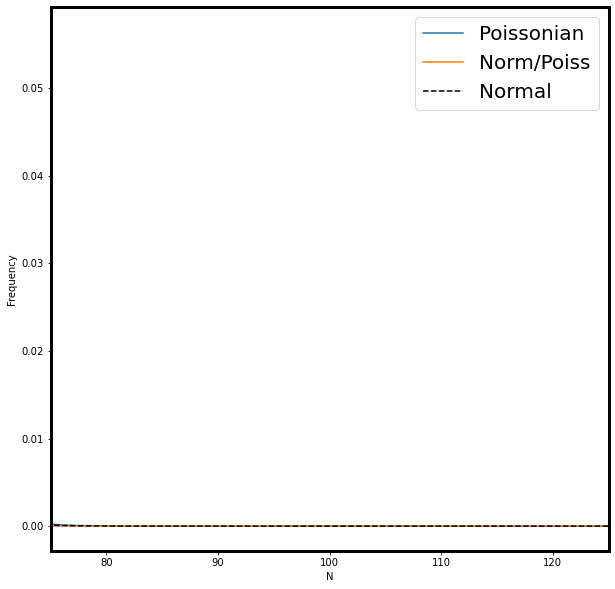

In [53]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( n_cent , simple_poiss_counts / n_samples , label = 'Poissonian')
plt.plot( n_cent -0.4, norm_poiss_counts / n_samples , label='Norm/Poiss')
plt.plot( n_cent , g_pdf( n_cent , lam_mean , lam_mean ) , 'k--' , label = 'Normal')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.xlim( 75 , 125 )
plt.legend( fontsize = 20 )

<ipython-input-470-f6e7ffe97fb1>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot( n_cent , simple_poiss_counts / norm_poiss_counts  - 1 , label = 'Poissonian')
<ipython-input-470-f6e7ffe97fb1>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( n_cent , simple_poiss_counts / norm_poiss_counts  - 1 , label = 'Poissonian')
<ipython-input-470-f6e7ffe97fb1>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( n_cent , norm_poiss_counts / norm_poiss_counts   - 1 , label='Norm/Poiss')
<ipython-input-470-f6e7ffe97fb1>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot( n_cent , g_pdf( n_cent , lam_mean , lam_mean ) * n_samples / norm_poiss_counts  - 1 , 'k--' , label = 'Normal')


(-1.0, 1.0)

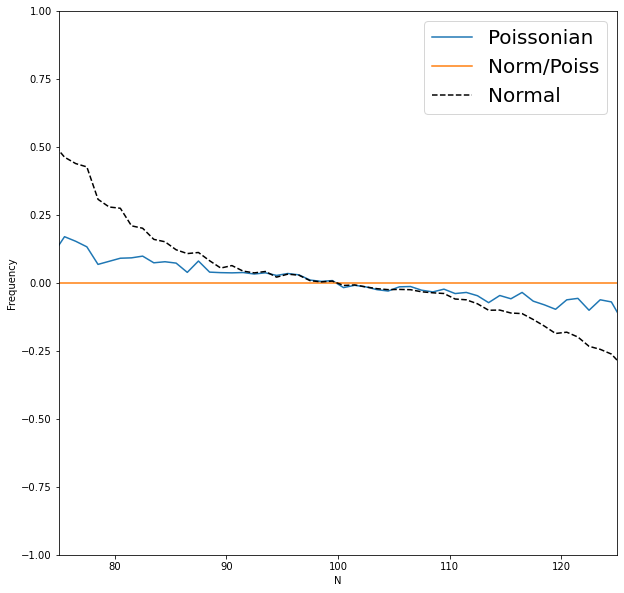

In [470]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( n_cent , simple_poiss_counts / norm_poiss_counts  - 1 , label = 'Poissonian')
plt.plot( n_cent , norm_poiss_counts / norm_poiss_counts   - 1 , label='Norm/Poiss')
plt.plot( n_cent , g_pdf( n_cent , lam_mean , lam_mean ) * n_samples / norm_poiss_counts  - 1 , 'k--' , label = 'Normal')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.xlim( 75 , 125 )
plt.legend( fontsize = 20 )
plt.ylim( -1 , 1 )

<ipython-input-429-02e86c53a99d>:2: RuntimeWarning: overflow encountered in power
  xfac = np.sqrt( 2 * np.pi * x ) * ( x / np.exp(1) ) ** x * ( 1 + 1/( 12 * x ) + 1/(288*x**2) -139/(51840*x**3) - 571/(2488320 * x**4))
<ipython-input-429-02e86c53a99d>:3: RuntimeWarning: overflow encountered in power
  return l**x * np.exp( -l )/  xfac
<ipython-input-429-02e86c53a99d>:3: RuntimeWarning: invalid value encountered in true_divide
  return l**x * np.exp( -l )/  xfac
<ipython-input-471-8ac72817796d>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot( n_cent , p_pdf( n_cent , lam_mean ) * n_samples / norm_poiss_counts - 1 , label = 'Poissonian')
<ipython-input-471-8ac72817796d>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( n_cent , norm_poiss_counts / norm_poiss_counts - 1 , label='Norm/Poiss')
<ipython-input-471-8ac72817796d>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot( n_cent , g_pdf( n_cent , lam_mean , lam_mean ) *

(-1.0, 1.0)

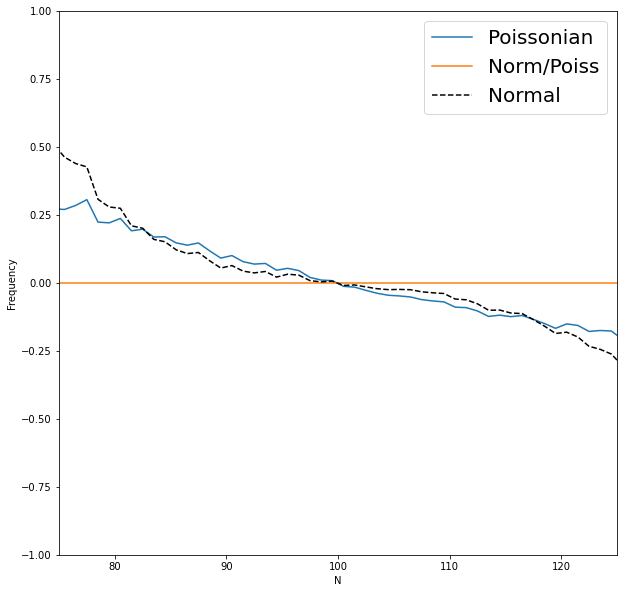

In [471]:
plt.figure( figsize = ( 10 , 10 ) )
plt.plot( n_cent , p_pdf( n_cent , lam_mean ) * n_samples / norm_poiss_counts - 1 , label = 'Poissonian')
plt.plot( n_cent , norm_poiss_counts / norm_poiss_counts - 1 , label='Norm/Poiss')
plt.plot( n_cent , g_pdf( n_cent , lam_mean , lam_mean ) * n_samples / norm_poiss_counts - 1 , 'k--' , label = 'Normal')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.xlim(  75 , 125 )
plt.legend( fontsize = 20 )
plt.ylim( -1 , 1 )

What is this new distribution? Just a poissonian.

Is it well described by,

\begin{equation}
p = \int p_{norm}( l_i , \left< l \right> ) p_{poiss}( l_i )
\end{equation}

Alt maybe consider better how $P(n|\Omega_m)$ changes because of this?